<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21619" size=6px>                   
                    <b>  Healthcare Industry 
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4.5px>                   
                    <b>  
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=2px>                                      
                    <b> 
                    <br>    
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4px>                   
                    <b>  Data analysis and Machine Learning Model Building 
                    </b>
                </font>
            </div>
         </td>
    </tr>
</table>

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.8px>                   
                    <b>  Author 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

* Rubina Bansal

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Business Requirement  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all 
share the clinical features of erythema and scaling, with very little differences. The diseases in this 
group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis 
rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share 
many histopathological features as well. Another difficulty for the differential diagnosis is that a 
disease may show the features of another disease at the beginning stage and may have the 
characteristic features at the following stages. Patients were first evaluated clinically with 12 features. 
Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of 
the histopathological features are determined by an analysis of the samples under a microscope. 

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Dataset Description   
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In the dataset constructed for this domain, the family history feature has the value 1 if any of these 
diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age 
of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 
to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 
2 indicate the relative intermediate values

This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.8px>                   
                    <b>  Objective 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

* Using USL, tried to classify patients into different groups based on their attributes. Also, used PCA for dimensionality reduction.

In [119]:
data = pd.read_csv(r"C:\Users\91978\OneDrive\Desktop\MODULES\USL\MOCK EXAMS\USL_Mock_Exam_Paper1-2\USL_Mock_Exam_Paper1\dermatology.csv")
derma_df = data.copy()
derma_df.head()

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [120]:
derma_df.columns=[ 'erythema','scaling','definite borders','itching', 'koebner phenomenon','polygonal papules',
           'follicular papules','oral mucosal involvement','knee and elbow involvement','scalp involvement',
'family history, (0 or 1)','melanin incontinence',
            'eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis',
  
'acanthosis',
'hyperkeratosis',
'parakeratosis',
'clubbing of the rete ridges',
'elongation of the rete ridges',
'thinning of the suprapapillary epidermis',
'spongiform pustule',
'munro microabcess',
'focal hypergranulosis',
'disappearance of the granular layer',
'vacuolisation and damage of basal layer',
'spongiosis',
'saw-tooth appearance of retes',
'follicular horn plug',
'perifollicular parakeratosis',
'inflammatory monoluclear inflitrate',
'band-like infiltrate','Age (linear)','class'

]

In [121]:
derma_df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),class
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [122]:
derma_df.shape

(365, 35)

In [123]:
derma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  365 non-null    int64 
 1   scaling                                   365 non-null    int64 
 2   definite borders                          365 non-null    int64 
 3   itching                                   365 non-null    int64 
 4   koebner phenomenon                        365 non-null    int64 
 5   polygonal papules                         365 non-null    int64 
 6   follicular papules                        365 non-null    int64 
 7   oral mucosal involvement                  365 non-null    int64 
 8   knee and elbow involvement                365 non-null    int64 
 9   scalp involvement                         365 non-null    int64 
 10  family history, (0 or 1)                  365 non-

`We need to change the data type for Age(linear).`

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  EXPLORATORY DATA ANALYSIS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [124]:
derma_df.describe().T

,count,mean,std,min,25%,50%,75%,max
erythema,365.0,2.068493,0.665656,0.0,2.0,2.0,2.0,3.0
scaling,365.0,1.794521,0.702408,0.0,1.0,2.0,2.0,3.0
definite borders,365.0,1.553425,0.905126,0.0,1.0,2.0,2.0,3.0
itching,365.0,1.361644,1.136632,0.0,0.0,1.0,2.0,3.0
koebner phenomenon,365.0,0.635616,0.908653,0.0,0.0,0.0,1.0,3.0
polygonal papules,365.0,0.449315,0.958353,0.0,0.0,0.0,0.0,3.0
follicular papules,365.0,0.167123,0.571304,0.0,0.0,0.0,0.0,3.0
oral mucosal involvement,365.0,0.378082,0.835057,0.0,0.0,0.0,0.0,3.0
knee and elbow involvement,365.0,0.613699,0.984120,0.0,0.0,0.0,1.0,3.0
scalp involvement,365.0,0.520548,0.906472,0.0,0.0,0.0,1.0,3.0


As we know `describe()` gives the summary of only numerical variables, no summary was provided for the Age column. We do a thorogh check of the column to see why it not a numerical column.

In [125]:
derma_df[derma_df['Age (linear)'].str.isdigit()==False]

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),class
32,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
33,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
34,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
35,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
261,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
262,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
263,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
264,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [126]:
#changing the '?' representing missing value to the standard null value
derma_df = derma_df.replace('?',np.nan)
derma_df = derma_df[~derma_df['Age (linear)'].isnull()]

In [127]:
#changing the datatype 
derma_df['Age (linear)'] = pd.to_numeric(derma_df['Age (linear)'])
derma_df.dtypes

erythema                                    int64
scaling                                     int64
definite borders                            int64
itching                                     int64
koebner phenomenon                          int64
polygonal papules                           int64
follicular papules                          int64
oral mucosal involvement                    int64
knee and elbow involvement                  int64
scalp involvement                           int64
family history, (0 or 1)                    int64
melanin incontinence                        int64
eosinophils in the infiltrate               int64
PNL infiltrate                              int64
fibrosis of the papillary dermis            int64
exocytosis                                  int64
acanthosis                                  int64
hyperkeratosis                              int64
parakeratosis                               int64
clubbing of the rete ridges                 int64


<a id="duplicates"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b> Check for Duplicate records
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [129]:
#check for duplicate records
derma_df.duplicated().sum()

0

No duplicate records found!

<a id="null"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Check for null values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [130]:
Total = (derma_df.isnull().sum()).sort_values(ascending=False)
Percent = (derma_df.isnull().sum()*100/derma_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent],axis=1, keys=['Total','Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
erythema,0,0.0
vacuolisation and damage of basal layer,0,0.0
elongation of the rete ridges,0,0.0
thinning of the suprapapillary epidermis,0,0.0
spongiform pustule,0,0.0
munro microabcess,0,0.0
focal hypergranulosis,0,0.0
disappearance of the granular layer,0,0.0
spongiosis,0,0.0
parakeratosis,0,0.0


No missing values found.

<a id="visualization"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Visualization plots to find the relationship amongst the variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

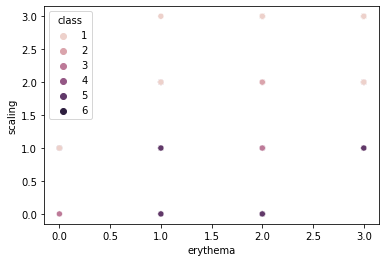

In [131]:
sns.scatterplot(derma_df['erythema'],derma_df['scaling'],hue=derma_df['class'])
plt.show()

<a id="correlation"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Covariance and Correlation tables for the data 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [132]:
derma_df.corr()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),class
erythema,1.000000,0.428913,0.248553,-0.032775,-0.008733,0.028079,-0.115390,-0.033552,0.138675,0.180637,...,0.153116,-0.004132,0.039621,-0.012570,-0.009075,0.006022,0.092819,-0.014022,-0.004635,-0.325124
scaling,0.428913,1.000000,0.349983,-0.073535,-0.008499,-0.074682,-0.098459,-0.084498,0.294055,0.296553,...,0.205574,-0.112811,0.021797,-0.117790,-0.014524,-0.015221,-0.007502,-0.134639,0.015097,-0.458324
definite borders,0.248553,0.349983,1.000000,-0.051813,0.237526,0.321831,-0.178948,0.279395,0.304414,0.259882,...,0.348977,0.290427,-0.245943,0.266296,-0.094818,-0.133532,0.119447,0.273899,0.145392,-0.385636
itching,-0.032775,-0.073535,-0.051813,1.000000,0.283927,0.415797,-0.143264,0.364791,-0.299320,-0.150710,...,-0.188967,0.374587,-0.004399,0.383274,-0.175680,-0.183976,0.056953,0.393242,0.043302,0.041880
koebner phenomenon,-0.008733,-0.008499,0.237526,0.283927,1.000000,0.387695,-0.176401,0.387423,-0.064746,0.012365,...,0.001517,0.371668,0.010356,0.376980,-0.150923,-0.167552,0.108140,0.376725,0.083798,-0.090646
polygonal papules,0.028079,-0.074682,0.321831,0.415797,0.387695,1.000000,-0.139835,0.863188,-0.278483,-0.259203,...,-0.123276,0.911542,0.093894,0.894709,-0.097430,-0.112365,0.257746,0.904050,0.098803,0.063844
follicular papules,-0.115390,-0.098459,-0.178948,-0.143264,-0.176401,-0.139835,1.000000,-0.134916,0.221237,-0.007808,...,-0.162027,-0.142797,-0.011169,-0.141949,0.784954,0.844695,-0.095097,-0.136796,-0.371177,0.488525
oral mucosal involvement,-0.033552,-0.084498,0.279395,0.364791,0.387423,0.863188,-0.134916,1.000000,-0.285815,-0.265582,...,-0.110448,0.886169,0.132848,0.873654,-0.084368,-0.108412,0.275158,0.890618,0.112871,0.061598
knee and elbow involvement,0.138675,0.294055,0.304414,-0.299320,-0.064746,-0.278483,0.221237,-0.285815,1.000000,0.660356,...,0.481475,-0.284820,-0.421838,-0.283021,0.232291,0.257138,-0.078093,-0.279370,-0.079756,-0.381958
scalp involvement,0.180637,0.296553,0.259882,-0.150710,0.012365,-0.259203,-0.007808,-0.265582,0.660356,1.000000,...,0.484803,-0.258688,-0.424626,-0.263418,-0.055503,-0.020856,0.025907,-0.256370,0.038505,-0.535954


In [133]:
derma_df.cov()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),class
erythema,0.443269,0.200595,0.148656,-0.024730,-0.005288,0.017900,-0.044338,-0.018727,0.091540,0.109826,...,0.088951,-0.002644,0.029687,-0.008041,-0.002754,0.001983,0.043181,-0.010355,-0.047257,-0.345395
scaling,0.200595,0.493438,0.220848,-0.058540,-0.005429,-0.050231,-0.039916,-0.049759,0.204797,0.190232,...,0.126003,-0.076150,0.017232,-0.079501,-0.004650,-0.005288,-0.003682,-0.104900,0.162402,-0.513714
definite borders,0.148656,0.220848,0.806974,-0.052749,0.194033,0.276823,-0.092775,0.210407,0.271126,0.213192,...,0.273542,0.250708,-0.248639,0.229849,-0.038822,-0.059319,0.074977,0.272905,2.000118,-0.552765
itching,-0.024730,-0.058540,-0.052749,1.284361,0.292607,0.451201,-0.093704,0.346576,-0.336323,-0.155974,...,-0.186865,0.407941,-0.005610,0.417351,-0.090745,-0.103106,0.045101,0.494303,0.751511,0.075733
koebner phenomenon,-0.005288,-0.005429,0.194033,0.292607,0.826929,0.337574,-0.092579,0.295345,-0.058375,0.010268,...,0.001204,0.324780,0.010599,0.329383,-0.062553,-0.075347,0.068714,0.379969,1.166958,-0.131527
polygonal papules,0.017900,-0.050231,0.276823,0.451201,0.337574,0.916832,-0.077275,0.692884,-0.264375,-0.226647,...,-0.102996,0.838731,0.101179,0.823144,-0.042520,-0.053206,0.172450,0.960123,1.448777,0.097544
follicular papules,-0.044338,-0.039916,-0.092775,-0.093704,-0.092579,-0.077275,0.333082,-0.065276,0.126593,-0.004115,...,-0.081594,-0.079195,-0.007255,-0.078715,0.206480,0.241077,-0.038350,-0.087566,-3.280521,0.449879
oral mucosal involvement,-0.018727,-0.049759,0.210407,0.346576,0.295345,0.692884,-0.065276,0.702782,-0.237560,-0.203317,...,-0.080792,0.713884,0.125334,0.703719,-0.032236,-0.044944,0.161182,0.828117,1.449037,0.082397
knee and elbow involvement,0.091540,0.204797,0.271126,-0.336323,-0.058375,-0.264375,0.126593,-0.237560,0.983004,0.597890,...,0.416533,-0.271362,-0.470683,-0.269616,0.104971,0.126074,-0.054103,-0.307218,-1.210957,-0.604263
scalp involvement,0.109826,0.190232,0.213192,-0.155974,0.010268,-0.226647,-0.004115,-0.203317,0.597890,0.833931,...,0.386303,-0.227009,-0.436393,-0.231132,-0.023101,-0.009418,0.016531,-0.259670,0.538476,-0.780954


<a id="outliers"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Outliers visualization and treatment using Capping
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Since Clustering algorithms are sensitive to putliers, we will check and treat them.

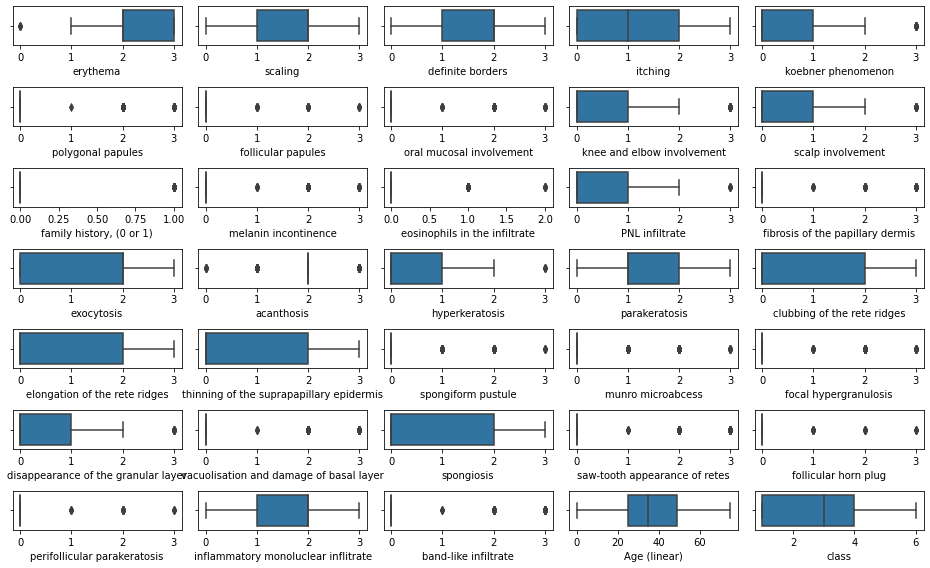

In [134]:
fig, ax = plt.subplots(7,5,figsize=(13,8))

for var,subplot in zip(derma_df.columns, ax.flatten()):
    sns.boxplot(derma_df[var], ax=subplot)
    
plt.tight_layout()
plt.show()

### Outlier treatment (Flooring and capping)

In [135]:
#outlier treatment
for col in derma_df.columns:
    percentiles = derma_df[col].quantile([0.01,0.99]).values
    derma_df[col][derma_df[col] <= percentiles[0]] = percentiles[0]
    derma_df[col][derma_df[col] >= percentiles[1]] = percentiles[1]

##### Distribution of variables

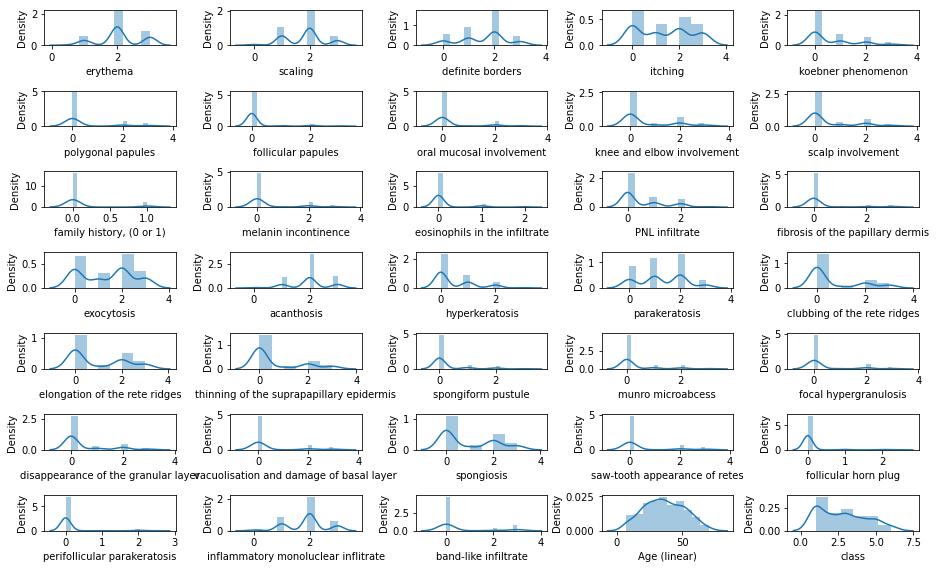

In [137]:
fig, ax = plt.subplots(7,5,figsize=(13,8))

for var,subplot in zip(derma_df.columns, ax.flatten()):
    sns.distplot(derma_df[var], ax=subplot)
    
plt.tight_layout()
plt.show()

<a id="preprocessing"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  DATA PREPROCESSING 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="transformation"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Transformation using Yeo-Johnson method
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [138]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()

df_trans = pd.DataFrame(transformer.fit_transform(derma_df), columns=derma_df.columns)
df_trans.skew()

erythema                                   -0.047520
scaling                                    -0.033069
definite borders                           -0.166268
itching                                    -0.119395
koebner phenomenon                          0.510463
polygonal papules                           1.583344
follicular papules                          2.826144
oral mucosal involvement                    1.631028
knee and elbow involvement                  0.824598
scalp involvement                           0.964573
family history, (0 or 1)                    2.301890
melanin incontinence                        1.560850
eosinophils in the infiltrate               2.383491
PNL infiltrate                              0.617123
fibrosis of the papillary dermis            2.083230
exocytosis                                 -0.167159
acanthosis                                 -0.034981
hyperkeratosis                              0.590109
parakeratosis                              -0.

<a id="scaling"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Scaling using Standard Scaler
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [139]:
sc = preprocessing.StandardScaler()
scaled_df = sc.fit_transform(df_trans.drop(['class'],axis=1))
scaled_df

array([[ 1.43914397,  1.72726189,  1.66679582, ..., -1.25470473,
        -0.51996746, -2.0091503 ],
       [-0.1526061 , -1.14945526,  0.4517876 , ...,  0.13515775,
         1.94068666, -0.63818648],
       [-0.1526061 ,  0.26464462,  0.4517876 , ...,  1.68716426,
        -0.51996746,  0.28590537],
       ...,
       [ 1.43914397,  0.26464462,  0.4517876 , ...,  0.13515775,
         1.94068666, -0.50092958],
       [-0.1526061 , -1.14945526,  1.66679582, ...,  0.13515775,
         1.94068666,  0.9046113 ],
       [ 1.43914397,  0.26464462,  0.4517876 , ...,  1.68716426,
        -0.51996746, -0.03510886]])

In [140]:
X_scaled=pd.DataFrame(scaled_df)

In [141]:
X_scaled.columns=[ 'erythema','scaling','definite borders','itching', 'koebner phenomenon','polygonal papules',
           'follicular papules','oral mucosal involvement','knee and elbow involvement','scalp involvement',
'family history, (0 or 1)','melanin incontinence',
            'eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis',
  
'acanthosis',
'hyperkeratosis',
'parakeratosis',
'clubbing of the rete ridges',
'elongation of the rete ridges',
'thinning of the suprapapillary epidermis',
'spongiform pustule',
'munro microabcess',
'focal hypergranulosis',
'disappearance of the granular layer',
'vacuolisation and damage of basal layer',
'spongiosis',
'saw-tooth appearance of retes',
'follicular horn plug',
'perifollicular parakeratosis',
'inflammatory monoluclear inflitrate',
'band-like infiltrate','Age (linear)'

]
X_scaled.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
0,1.439144,1.727262,1.666796,0.654337,1.002110,-0.485058,-0.319142,-0.476201,1.227074,1.405735,...,-0.493792,-0.592896,-0.498209,-0.895952,-0.498188,-0.256265,-0.25,-1.254705,-0.519967,-2.009150
1,-0.152606,-1.149455,0.451788,1.326258,1.002110,2.074119,-0.319142,2.119562,-0.674116,-0.631294,...,2.038340,-0.592896,2.004593,1.396287,2.007748,-0.256265,-0.25,0.135158,1.940687,-0.638186
2,-0.152606,0.264645,0.451788,-1.269397,-0.794472,-0.485058,-0.319142,-0.476201,1.613809,1.636697,...,-0.493792,1.775758,-0.498209,-0.895952,-0.498188,-0.256265,-0.25,1.687164,-0.519967,0.285905
3,-0.152606,1.727262,0.451788,0.654337,1.417946,2.056392,-0.319142,2.108887,-0.674116,-0.631294,...,2.038340,1.735711,2.025101,1.097983,2.027956,-0.256265,-0.25,0.135158,1.940687,0.598792
4,-0.152606,1.727262,0.451788,-1.269397,-0.794472,-0.485058,-0.319142,-0.476201,-0.674116,-0.631294,...,-0.493792,-0.592896,-0.498209,1.097983,-0.498188,-0.256265,-0.25,-1.254705,-0.519967,0.349095


In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<a id="vif"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Checking multicollinearity by analyzing VIF
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

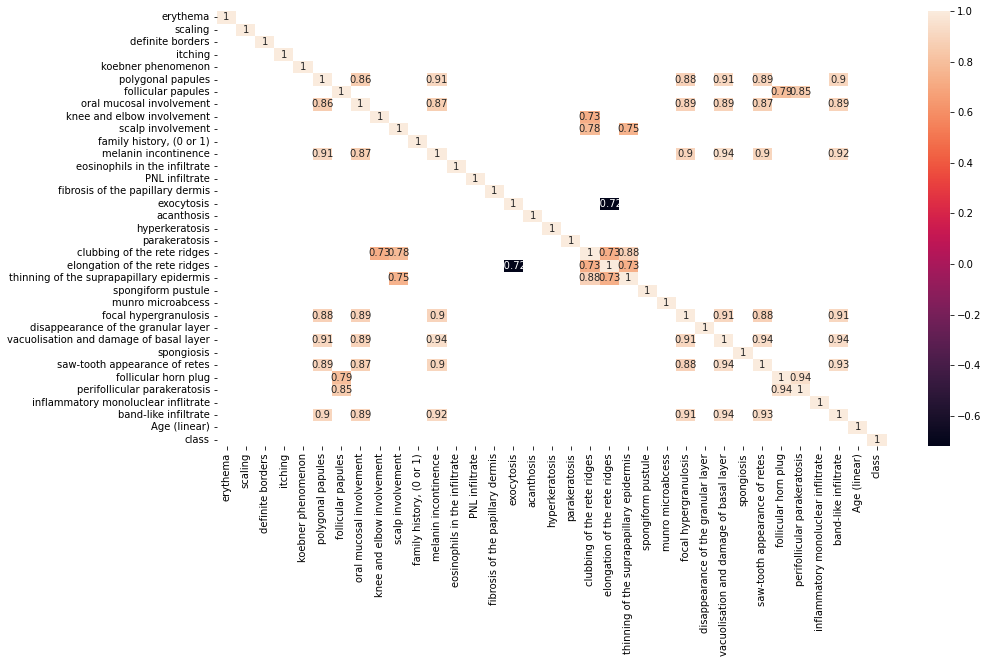

In [143]:
plt.figure(figsize=(15,8))
sns.heatmap(derma_df.corr()[(derma_df.corr() > 0.7) | (derma_df.corr() < -0.7)],annot=True)
plt.show()

In [144]:
X=derma_df.iloc[:,0:34]

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

,VIF Factor,Features
0,14.635282,erythema
1,12.256998,scaling
2,8.227309,definite borders
3,3.987864,itching
4,2.327719,koebner phenomenon
5,10.506078,polygonal papules
6,4.521274,follicular papules
7,8.458287,oral mucosal involvement
8,4.723372,knee and elbow involvement
9,4.321953,scalp involvement


We can see from heatmap that there is a high correlation between a number of columns. So, we use PCA for dimensionality reduction.

<a id="pca"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Principal Component Analysis (PCA)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [145]:
#split the data and the target
X = X_scaled
y = derma_df['class']
y.value_counts()

1    111
3     71
2     59
5     48
4     48
6     20
Name: class, dtype: int64

In [146]:
# Obtain covariance matrix for X_std
cov_matrix = np.cov(X_scaled.T)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.00280899  0.42198047  0.24169267 ...  0.09947665 -0.01175246
  -0.00214153]
 [ 0.42198047  1.00280899  0.35496775 ... -0.01163665 -0.13139621
   0.01712276]
 [ 0.24169267  0.35496775  1.00280899 ...  0.12159652  0.25887132
   0.15092091]
 ...
 [ 0.09947665 -0.01163665  0.12159652 ...  1.00280899  0.25385358
   0.09183262]
 [-0.01175246 -0.13139621  0.25887132 ...  0.25385358  1.00280899
   0.11112321]
 [-0.00214153  0.01712276  0.15092091 ...  0.09183262  0.11112321
   1.00280899]]


In [147]:
#Calculate eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 13x13 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 13x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.04128112  0.11309049 -0.0577956  ... -0.01956802 -0.02389515
  -0.00423665]
 [ 0.09491841  0.1322243  -0.06419254 ...  0.0097925  -0.01375604
   0.02110072]
 [ 0.01429521  0.29444346 -0.06612479 ... -0.03834575 -0.03684418
  -0.03091074]
 ...
 [-0.06872146  0.10860334  0.0050625  ... -0.00572263  0.00126145
   0.0107505 ]
 [-0.25856327  0.20659862 -0.08571364 ... -0.48153739 -0.1892764
  -0.00764938]
 [-0.01538291  0.1322554   0.27201391 ...  0.00342266  0.02897851
   0.0096851 ]]

Eigenvalues of Cov(X): 
[9.78418753 5.58064067 3.0750287  2.26496873 1.35306515 1.33185591
 0.96940248 0.91623052 0.8648642  0.80852442 0.82292975 0.69859224
 0.66864097 0.627837   0.5862166  0.55000013 0.47210239 0.42037879
 0.33056633 0.32489179 0.30662255 0.25239976 0.24519407 0.21106504
 0.18145829 0.01492775 0.02583855 0.03570783 0.07951346 0.07333035
 0.06608344 0.04586882 0.05073192 0.05583947]


In [148]:
# Make pair of eigenvalue, eigenvector
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Do it in descending ordered
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# sorted eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[9.784187533447195, 5.580640672800679, 3.075028695361735, 2.264968733132462, 1.3530651488546048, 1.331855908842311, 0.9694024774166446, 0.9162305238624162, 0.8648642041289083, 0.8229297525364925, 0.808524417377426, 0.6985922360240419, 0.6686409686959969, 0.6278370026554216, 0.5862166016346175, 0.5500001278728807, 0.47210238950954775, 0.4203787878225955, 0.3305663313283203, 0.3248917912200137, 0.30662254860943194, 0.2523997607549159, 0.2451940716557862, 0.2110650413055715, 0.1814582949020704, 0.07951346173010443, 0.07333034528656356, 0.06608343791748804, 0.05583947065720063, 0.050731923636779475, 0.04586882126089761, 0.03570783205258299, 0.025838550251596745, 0.014927753432249564]


In [149]:
#Cumulative Variance
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 28.69641425  45.06408668  54.08295483  60.72596742  64.69442345
  68.6006741   71.44387135  74.13111856  76.66771155  79.08131339
  81.45266528  83.50159292  85.46267534  87.30408227  89.02341915
  90.63653536  92.02118234  93.25412721  94.22365773  95.17654517
  96.07585006  96.81612287  97.53526186  98.15430251  98.68650842
  98.91971646  99.13478981  99.32860843  99.49238213  99.64117571
  99.77570611  99.88043496  99.95621783 100.        ]


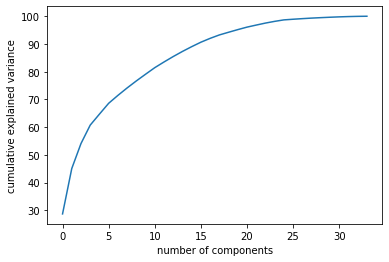

In [150]:
plt.plot(cum_var_exp)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [151]:
pca = PCA()
data_scaled_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns=X_scaled.columns)

In [152]:
var = pca.explained_variance_ratio_
var_cum = var.cumsum()
var_cum

array([0.28696414, 0.45064087, 0.54082955, 0.60725967, 0.64694423,
       0.68600674, 0.71443871, 0.74131119, 0.76667712, 0.79081313,
       0.81452665, 0.83501593, 0.85462675, 0.87304082, 0.89023419,
       0.90636535, 0.92021182, 0.93254127, 0.94223658, 0.95176545,
       0.9607585 , 0.96816123, 0.97535262, 0.98154303, 0.98686508,
       0.98919716, 0.9913479 , 0.99328608, 0.99492382, 0.99641176,
       0.99775706, 0.99880435, 0.99956218, 1.        ])

In [153]:
n_comps = 1 + np.argmax(var_cum > 0.90)
n_comps

16

In [154]:
# Keep the first 16 principal components 
P_reduce = np.array(eigvectors_sort[0:16]).transpose()
# The projected data in 2D will be n x 7 matrix
Proj_data_2D = np.dot(X_scaled,P_reduce)

In [155]:
X_scaled.shape, P_reduce.shape, Proj_data_2D.shape

((357, 34), (34, 16), (357, 16))

##### Building a dataframe with the principal components

In [156]:
pca = PCA()
df_pca = pd.DataFrame(Proj_data_2D, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                                             'PC10','PC11','PC12','PC13','PC14','PC15','PC16'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,3.969184,2.670147,-1.118194,-1.361739,0.997467,0.833431,-0.641222,-2.218516,1.827390,0.991259,0.111756,-1.761218,-0.083576,-0.835923,0.098241,1.457177
1,-5.422033,2.233592,-0.685863,0.322537,-0.144054,0.249548,-0.277837,0.064157,1.261637,0.699030,-0.648259,0.513663,0.203308,-0.255989,0.110656,0.244768
2,3.959950,2.318024,0.235970,-0.522577,-0.251491,-1.098287,2.168393,1.816368,0.695888,-0.691747,-0.164051,0.462502,0.054100,0.158656,-0.643658,0.417344
3,-5.041785,2.802091,-0.220031,-0.670349,-1.046041,-0.772548,-0.685751,-0.281865,0.037334,-0.138444,0.163137,-1.209703,-0.816939,1.229234,-1.352268,-0.880036
4,0.482190,-1.323876,1.019906,-3.031998,1.984858,0.695912,-0.817811,1.865398,0.051617,-1.445722,-0.048433,-0.733144,-0.578336,-0.000856,-0.552189,1.599810


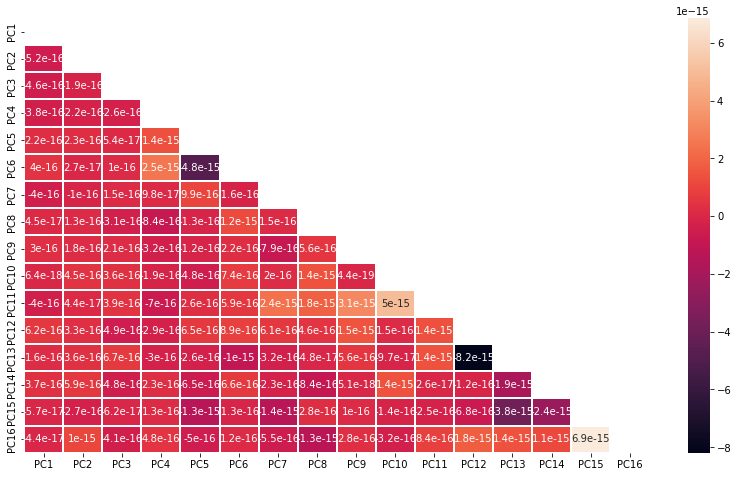

In [157]:
plt.figure(figsize=(14,8))
corr_matrix = df_pca.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, linewidths=2, mask=mask)
plt.show()

We can see PCA has removed multicollinearity.

<a id="clustering"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Clustering using K-means and Agglomerative clustering
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="kmeans"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  K-Means Clustering
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Using PCA dimensions to cluster the data. 

In [184]:
# kmeans clustering
cluster_range = range(2,11)
cluster_errors = []

for k in cluster_range:
  clusters = KMeans(k, random_state=10 )
  clusters.fit(df_pca)
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df.head(7)

,num_clusters,cluster_errors
0,2,8030.131655
1,3,5833.152980
2,4,4818.757762
3,5,4150.992134
4,6,3908.436627
5,7,3693.613005
6,8,3521.542118


<a id="elbow"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Elbow Plot to find optimum number of clusters
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

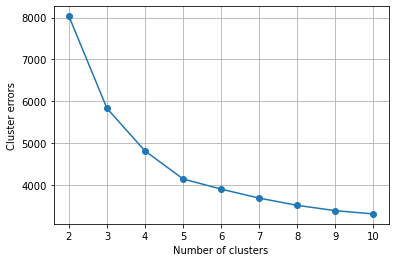

In [185]:
#Elbow Plot
plt.plot(list(range(2,11)),cluster_errors,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster errors')
plt.grid()
plt.show()

##### From this elbow curve it can be easily seen that the drop in errors after 4 becomes very smooth. Thus taking 4 to be the Number of Clusters.

In [186]:
silhouette_scores = []

for k in range(2,11):
    clusters = KMeans(n_clusters=k, random_state=10)
    clusters = clusters.fit(df_pca)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    silhouette_scores.append(silhouette_score(df_pca, clusters.labels_, random_state=10))

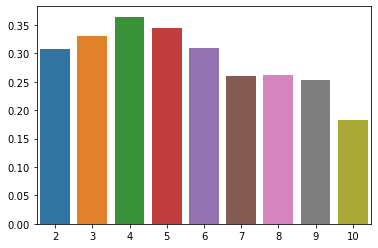

In [187]:
sns.barplot(x=list(range(2,11)), y=silhouette_scores)
plt.show()

##### KMeans

In [188]:
kmeans = KMeans(n_clusters=4, random_state=10)
kmeans.fit(df_pca)
centroids = kmeans.cluster_centers_

label = km_model.labels_

In [189]:
inertia_km = clusters.inertia_
inertia_km
#we will compare inertia with other clustering algorithms to see which one is doing a better job

3316.698133593746

The elbow plot show only 4 clusters. Let us see the clusters using Hierarchial Clustering and compare.

<a id="hierarchial"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Hierarchical clustering
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [190]:
# generate the linkage matrix
Z = linkage(df_pca, 'ward')

<a id="dendrogram"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Dendrogram to find optimum number of clusters
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

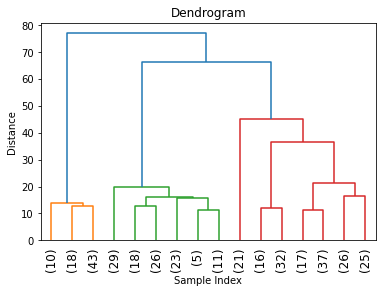

In [191]:
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90,leaf_font_size=12, truncate_mode='lastp',p=16)  # show only the last p merged clusters
plt.show()

As expected, the dendrogram shows lot of overlapping clusters. This makes sense that the given the no. of classes is 5 and the kmeans shows 4 clusters. Hence, hierarchical clustering is the best choice for the same when we look at the dendrogram. 

##### Using the cluster labels from the best method above (hierarchial) and interpreting the clusters formed.

In [197]:
agg_model = AgglomerativeClustering(n_clusters=5).fit(df_pca)

In [199]:
print('Silhouette Score: KMeans', silhouette_score(df_pca, kmeans.labels_))

Silhouette Score: KMeans 0.36476237517767784


In [200]:
print('Silhouette Score: Agglomerative Clustering', silhouette_score(df_pca, agg_model.labels_))

Silhouette Score: Agglomerative Clustering 0.3444051531400476


#### Agglomerative clustering

In [207]:
clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
clustering 

AgglomerativeClustering(n_clusters=5)

In [209]:
label_agg = clustering.labels_

#### KMeans clustering

In [210]:
kmeans = KMeans(n_clusters=4, random_state=10).fit(df_pca)
label_km = km_model.labels_

<a id="target"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Add Cluster labels as target variable
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [216]:
df_new = pd.concat([df_pca,pd.Series(label_agg,name = "target_agg")],axis =1)
df_new['target_km'] = label_km
df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,target_agg,target_km
0,3.969184,2.670147,-1.118194,-1.361739,0.997467,0.833431,-0.641222,-2.218516,1.827390,0.991259,0.111756,-1.761218,-0.083576,-0.835923,0.098241,1.457177,2,1
1,-5.422033,2.233592,-0.685863,0.322537,-0.144054,0.249548,-0.277837,0.064157,1.261637,0.699030,-0.648259,0.513663,0.203308,-0.255989,0.110656,0.244768,4,2
2,3.959950,2.318024,0.235970,-0.522577,-0.251491,-1.098287,2.168393,1.816368,0.695888,-0.691747,-0.164051,0.462502,0.054100,0.158656,-0.643658,0.417344,2,1
3,-5.041785,2.802091,-0.220031,-0.670349,-1.046041,-0.772548,-0.685751,-0.281865,0.037334,-0.138444,0.163137,-1.209703,-0.816939,1.229234,-1.352268,-0.880036,4,2
4,0.482190,-1.323876,1.019906,-3.031998,1.984858,0.695912,-0.817811,1.865398,0.051617,-1.445722,-0.048433,-0.733144,-0.578336,-0.000856,-0.552189,1.599810,0,0


In [217]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PC1         357 non-null    float64
 1   PC2         357 non-null    float64
 2   PC3         357 non-null    float64
 3   PC4         357 non-null    float64
 4   PC5         357 non-null    float64
 5   PC6         357 non-null    float64
 6   PC7         357 non-null    float64
 7   PC8         357 non-null    float64
 8   PC9         357 non-null    float64
 9   PC10        357 non-null    float64
 10  PC11        357 non-null    float64
 11  PC12        357 non-null    float64
 12  PC13        357 non-null    float64
 13  PC14        357 non-null    float64
 14  PC15        357 non-null    float64
 15  PC16        357 non-null    float64
 16  target_agg  357 non-null    int64  
 17  target_km   357 non-null    int32  
dtypes: float64(16), int32(1), int64(1)
memory usage: 48.9 KB


In [218]:
df_new['target_agg'].value_counts()

2    112
0    107
4     71
1     47
3     20
Name: target_agg, dtype: int64

In [219]:
df_new['target_km'].value_counts()

1    110
0    107
2     71
3     48
4     21
Name: target_km, dtype: int64

<a id="interpretation"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Interpretation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Overall analysis:**   <br>

Both of the Clustering models are performing well.

PCA is having a positive effect on the linear model as it removes multicollinearity. With PCA, the dimensionality is reduced from 35 features to 16 components.

****